## Data Wrangling

### Imports

In [3]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [5]:
#Loads the dataset from the local .csv file
df = pd.read_csv('retail_store_inventory.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

We can see from the output that we have 73,100 rows, 15 columns, and no missing values exist in the dataset. How fortunate!

In [8]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


### Exploring the Data

In [10]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

Columns appear to be labeled well and make sense with the first few rows we saw from the head() method.

In [12]:
df.dtypes

Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
dtype: object

From the dtypes() method, we see a number of integer columns, floats, and strings. An important distinction to note is the Date column being stored as a string, not datetime.

In [14]:
df['Date'].describe()

count          73100
unique           731
top       2022-01-01
freq             100
Name: Date, dtype: object

There are 731 unique time points in the dataset. Let's convert the variable and verify we get the same results.

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
df.dtypes

Date                  datetime64[ns]
Store ID                      object
Product ID                    object
Category                      object
Region                        object
Inventory Level                int64
Units Sold                     int64
Units Ordered                  int64
Demand Forecast              float64
Price                        float64
Discount                       int64
Weather Condition             object
Holiday/Promotion              int64
Competitor Pricing           float64
Seasonality                   object
dtype: object

In [18]:
df['Date'].unique()

<DatetimeArray>
['2022-01-01 00:00:00', '2022-01-02 00:00:00', '2022-01-03 00:00:00',
 '2022-01-04 00:00:00', '2022-01-05 00:00:00', '2022-01-06 00:00:00',
 '2022-01-07 00:00:00', '2022-01-08 00:00:00', '2022-01-09 00:00:00',
 '2022-01-10 00:00:00',
 ...
 '2023-12-23 00:00:00', '2023-12-24 00:00:00', '2023-12-25 00:00:00',
 '2023-12-26 00:00:00', '2023-12-27 00:00:00', '2023-12-28 00:00:00',
 '2023-12-29 00:00:00', '2023-12-30 00:00:00', '2023-12-31 00:00:00',
 '2024-01-01 00:00:00']
Length: 731, dtype: datetime64[ns]

In [19]:
df.Date

0       2022-01-01
1       2022-01-01
2       2022-01-01
3       2022-01-01
4       2022-01-01
           ...    
73095   2024-01-01
73096   2024-01-01
73097   2024-01-01
73098   2024-01-01
73099   2024-01-01
Name: Date, Length: 73100, dtype: datetime64[ns]

Now the Date column is correctly formatted. Additionally, we can see the dates start on January 1st, 2022, end on January 1st, 2024, and are taken on daily intervals; i.e., there are no hours, minutes, or seconds involved with the measurements. The number of unique values (731) verifies the span of 2 years.

#### Categorical Features

In [22]:
df.select_dtypes('object')

,Store ID,Product ID,Category,Region,Weather Condition,Seasonality
0,S001,P0001,Groceries,North,Rainy,Autumn
1,S001,P0002,Toys,South,Sunny,Autumn
2,S001,P0003,Toys,West,Sunny,Summer
3,S001,P0004,Toys,North,Cloudy,Autumn
4,S001,P0005,Electronics,East,Sunny,Summer
...,...,...,...,...,...,...
73095,S005,P0016,Furniture,East,Snowy,Winter
73096,S005,P0017,Toys,North,Cloudy,Autumn
73097,S005,P0018,Clothing,West,Rainy,Winter
73098,S005,P0019,Toys,East,Rainy,Spring


Let's check the range of values and counts of each for the categorical variables.

In [24]:
[df[x].value_counts().sort_values(ascending=False) for x in df.select_dtypes('object')]

[Store ID
 S001    14620
 S002    14620
 S003    14620
 S004    14620
 S005    14620
 Name: count, dtype: int64,
 Product ID
 P0001    3655
 P0002    3655
 P0003    3655
 P0004    3655
 P0005    3655
 P0006    3655
 P0007    3655
 P0008    3655
 P0009    3655
 P0010    3655
 P0011    3655
 P0012    3655
 P0013    3655
 P0014    3655
 P0015    3655
 P0016    3655
 P0017    3655
 P0018    3655
 P0019    3655
 P0020    3655
 Name: count, dtype: int64,
 Category
 Furniture      14699
 Toys           14643
 Clothing       14626
 Groceries      14611
 Electronics    14521
 Name: count, dtype: int64,
 Region
 East     18349
 South    18297
 North    18228
 West     18226
 Name: count, dtype: int64,
 Weather Condition
 Sunny     18290
 Rainy     18278
 Snowy     18272
 Cloudy    18260
 Name: count, dtype: int64,
 Seasonality
 Spring    18317
 Summer    18305
 Winter    18285
 Autumn    18193
 Name: count, dtype: int64]

All categories look to be fairly evenly distributed and appear to sum to 71,300, but we'll verify to be sure.

In [26]:
[df[x].value_counts().sort_values(ascending=False).sum() for x in df.select_dtypes('object')]

[73100, 73100, 73100, 73100, 73100, 73100]

Looks good! Now let's take a look at the numeric columns.

#### Numeric Features

In [29]:
df.drop(columns=['Date']).describe().T

,count,mean,std,min,25%,50%,75%,max
Inventory Level,73100.0,274.469877,129.949514,50.00,162.00,273.000,387.0000,500.00
Units Sold,73100.0,136.464870,108.919406,0.00,49.00,107.000,203.0000,499.00
Units Ordered,73100.0,110.004473,52.277448,20.00,65.00,110.000,155.0000,200.00
Demand Forecast,73100.0,141.494720,109.254076,-9.99,53.67,113.015,208.0525,518.55
Price,73100.0,55.135108,26.021945,10.00,32.65,55.050,77.8600,100.00
Discount,73100.0,10.009508,7.083746,0.00,5.00,10.000,15.0000,20.00
Holiday/Promotion,73100.0,0.497305,0.499996,0.00,0.00,0.000,1.0000,1.00
Competitor Pricing,73100.0,55.146077,26.191408,5.03,32.68,55.010,77.8200,104.94


The minimum and maximum values look plausible, but values for the Holiday/Promotion column look odd. We can see the range is 0-1, which implies we are dealing with a binary variable. The column is fine as-is, but we need to keep this in mind as a consideration while modeling.

Finally, we see that our target variable, Demand Forecast, has a minimum value of -9.99, maximum of 518.55, and mean of 141.49472.

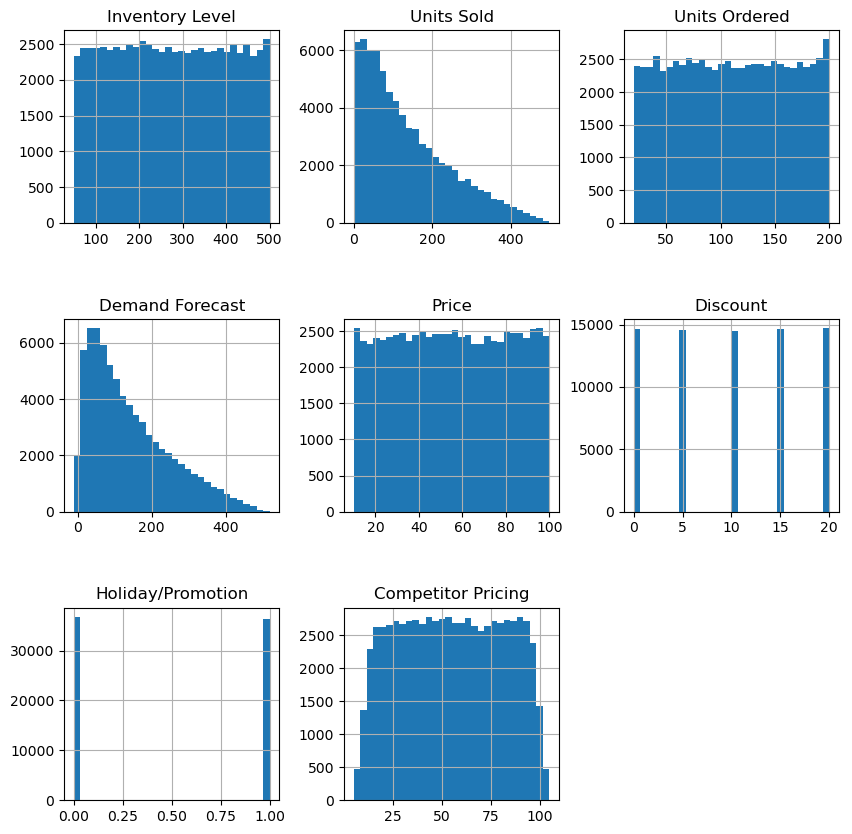

In [31]:
df.drop(columns='Date').hist(bins=30, figsize=(10,10))
plt.subplots_adjust(hspace=0.5)

Inventory Level, Units Ordered, Price, and Discount look to be nearly uniformly distributed. Competitor Pricing is similar, but has a few more values on the lower and upper ends of the distribution. Finally, Units Sold and Demand Forecast have unimodal, right-tailed distributions; log-normal or exponential transformations may be useful considerations.

### Save Data

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                73100 non-null  datetime64[ns]
 1   Store ID            73100 non-null  object        
 2   Product ID          73100 non-null  object        
 3   Category            73100 non-null  object        
 4   Region              73100 non-null  object        
 5   Inventory Level     73100 non-null  int64         
 6   Units Sold          73100 non-null  int64         
 7   Units Ordered       73100 non-null  int64         
 8   Demand Forecast     73100 non-null  float64       
 9   Price               73100 non-null  float64       
 10  Discount            73100 non-null  int64         
 11  Weather Condition   73100 non-null  object        
 12  Holiday/Promotion   73100 non-null  int64         
 13  Competitor Pricing  73100 non-null  float64   

In [52]:
df.to_csv('retail_cleaned.csv')